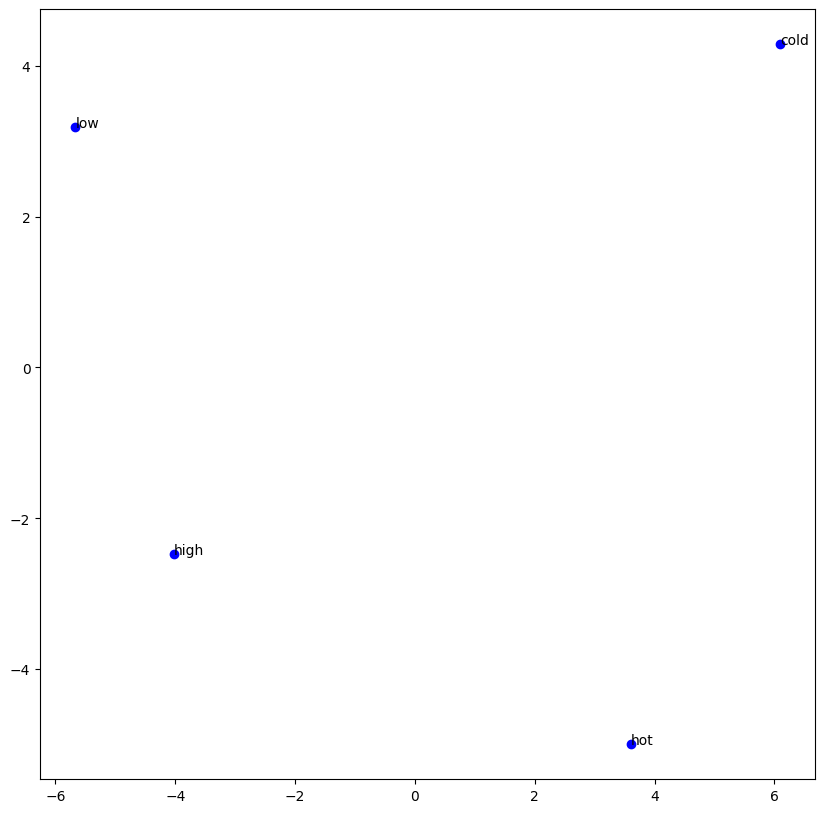

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import ollama

MODEL = 'snowflake-arctic-embed:latest'
#strings = ['really tasty delicious', 'disgusting awful overcooked', 'intriguing and interesting taste profile', 'decent but not memorable']
strings = ['low', 'cold', 'high', 'hot']
vectors = []
for string in strings:
    vectors.append(ollama.embeddings(model=MODEL, prompt=string)['embedding'])

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

dart = 'hello'

plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue')
for i, txt in enumerate(strings):
    plt.annotate(txt, (vectors_2d[i, 0], vectors_2d[i, 1]))
    


[[3.31081548 2.24321093]]
[[-5.66774683  3.18516887]
 [ 6.08997767  4.28331466]
 [-4.0233192  -2.47391146]
 [ 3.60108836 -4.99457206]]


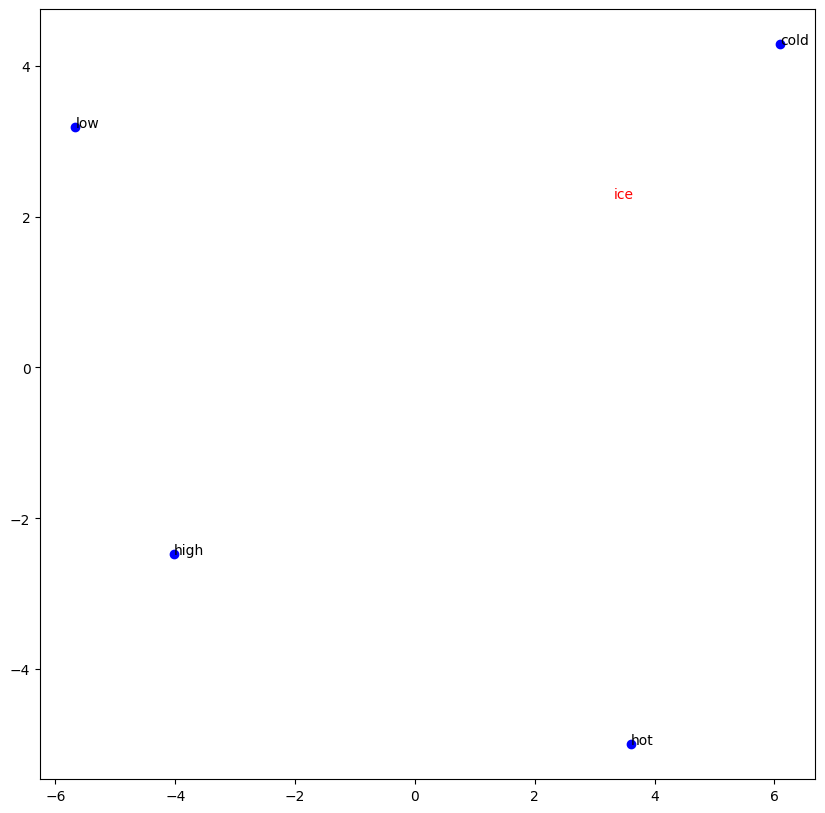

In [33]:
dart = 'ice'
dart_vec = ollama.embeddings(model=MODEL, prompt=dart)['embedding']
dart_2d = pca.transform([dart_vec])

plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue')
for i, txt in enumerate(strings):
    plt.annotate(txt, (vectors_2d[i, 0], vectors_2d[i, 1]))
plt.annotate(dart, (dart_2d[0, 0], dart_2d[0, 1]), c='red')

print(dart_2d)
print(vectors_2d)
